<a href="https://colab.research.google.com/github/salv0304/Colab/blob/main/Copia_di_Diffrazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relazione Diffrazione**

In [ ]:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt  
from google.colab import files
import pandas as pd
from google.colab import files
from scipy.optimize import curve_fit 

##Singola Fenditura

Nella prima parte dell'esperienza studiamo la diffrazione dovuta ad una singola fenditura. Vogliamo verificare la legge 

**$sin\theta=\frac{\lambda}{b}p$**

con 


*   $\theta$ angolo di diffrazione;
*   $\lambda$ lunghezza d'onda del laser;
*   $b$ ampiezza della fenditura ;
*   $p$ ordine del minimo di diffrazione.



Ci siamo posti ad una distanza $L$ tra la fenditura e la figura di diffrazione di 230cm. Sia $l$ distanza tra il centro della figura di diffrazione e il minimo di ordine $p$, poiché $b<<l$  possiamo utilizzare l'approssimazione $tan\theta ≈sen\theta ≈ \theta$ e misurare l'angolo di diffrazione semplicemente facendo $\theta= \frac{d}{L}$.


 Per il laser rosso $\lambda=630 nm$, mentre per il laser verde $\lambda=532 nm$.


 Fittiamo $b$ e verifichiamo che sia consistente con il dato aspettato.

###Laser Rosso

In [ ]:
def retta(x,b,c):
    theta= 630E-9*x/b +c
    return theta

####Fenditura $b=0.1mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00575221238938053
2.0 	 0.0101769911504425
3.0 	 0.0172566371681416
4.0 	 0.0238938053097345
5.0 	 0.0300884955752212
6.0 	 0.036283185840708


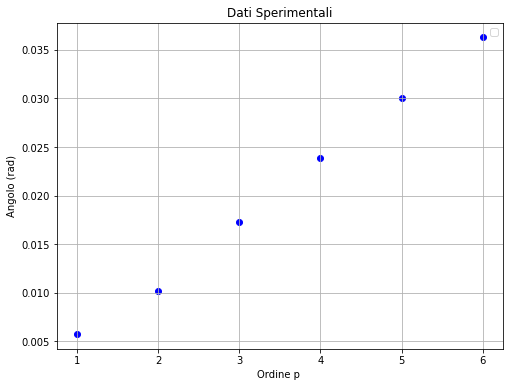

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.1.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

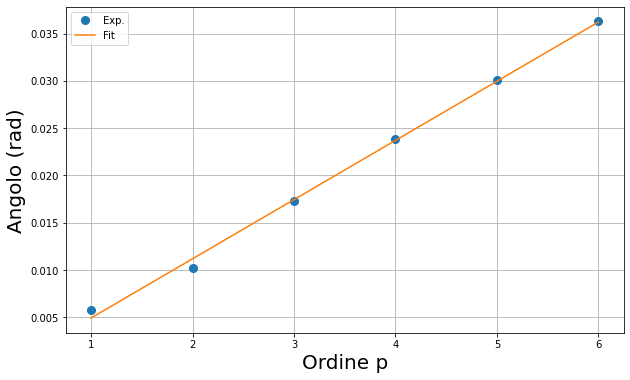

          b = 0.0001006727 +- 0.0000025726
          c = -0.0013274336 +- 0.0006227713




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0)

####Fenditura $b=0.2mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00309734513274336
2.0 	 0.00663716814159292
3.0 	 0.00929203539823009
4.0 	 0.0123893805309735
5.0 	 0.015929203539823
6.0 	 0.020353982300885


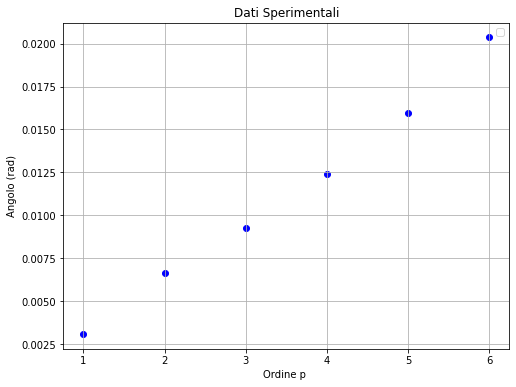

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.2.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

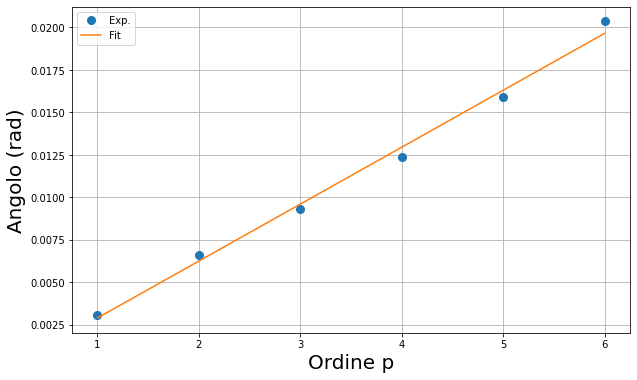

          b = 0.0001880491 +- 0.0000074425
          c = -0.0004424779 +- 0.0005163747




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.001,0)

####Fenditura $b=0.4mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00154867256637168
2.0 	 0.00331858407079646
3.0 	 0.00464601769911504
4.0 	 0.00641592920353982
5.0 	 0.0081858407079646
6.0 	 0.00973451327433629
7.0 	 0.0110619469026549
8.0 	 0.0128318584070796


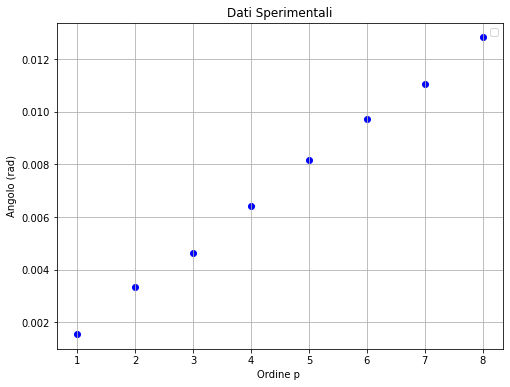

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.4.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

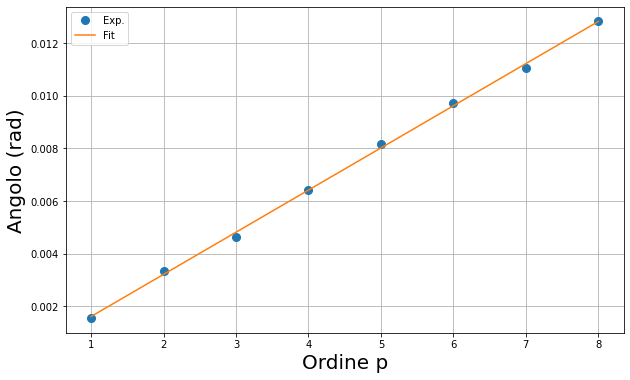

          b = 0.0003927720 +- 0.0000000000
          c = 0.0000000000 +- 0.0000000007




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0.0001)

###Laser Verde

In [ ]:
def retta(x,b,c):
    theta= 532E-9*x/b +c
    return theta

####Fenditura $b=0.1 mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00530973451327434
2.0 	 0.00973451327433629
3.0 	 0.0146017699115044
4.0 	 0.0199115044247788
5.0 	 0.0252212389380531
6.0 	 0.0300884955752212
7.0 	 0.0353982300884956


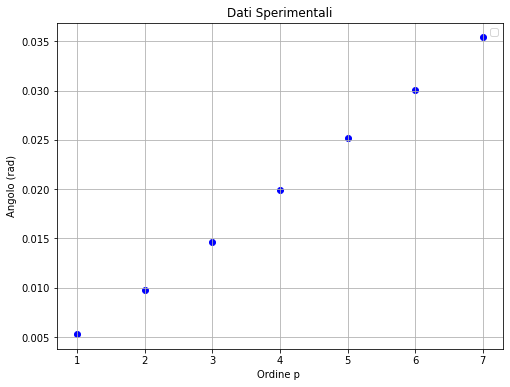

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.1.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

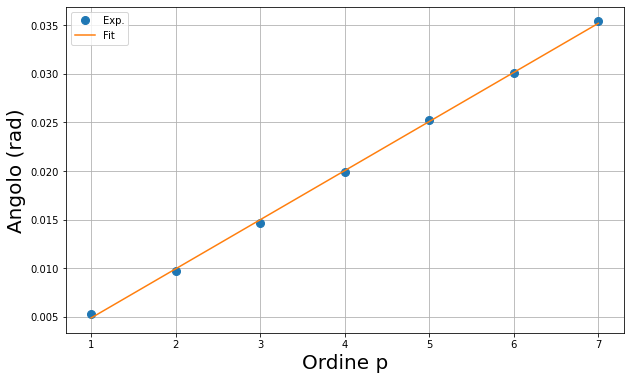

          b = 0.0001052030 +- 0.0000011762
          c = -0.0001896333 +- 0.0002528446




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0)

####Fenditura $b=0.2mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00309734513274336
2.0 	 0.00530973451327434
3.0 	 0.0079646017699115
4.0 	 0.0101769911504425
5.0 	 0.0128318584070796
6.0 	 0.0168141592920354


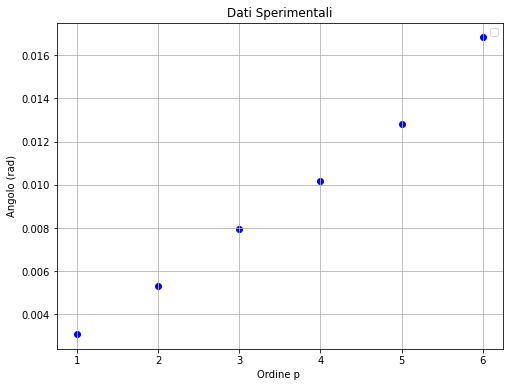

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.2.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

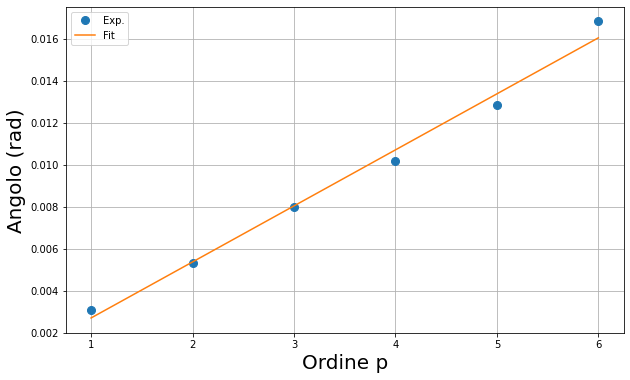

          b = 0.0001994370 +- 0.0000103253
          c = 0.0000294991 +- 0.0005378360




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0)

####Fenditura $b=0.4mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00132743362831858
2.0 	 0.00265486725663717
3.0 	 0.00398230088495575
4.0 	 0.00575221238938053
5.0 	 0.00663716814159292
6.0 	 0.0079646017699115
7.0 	 0.00929203539823009


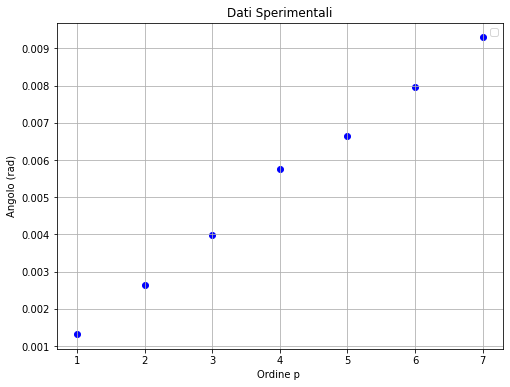

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.4.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

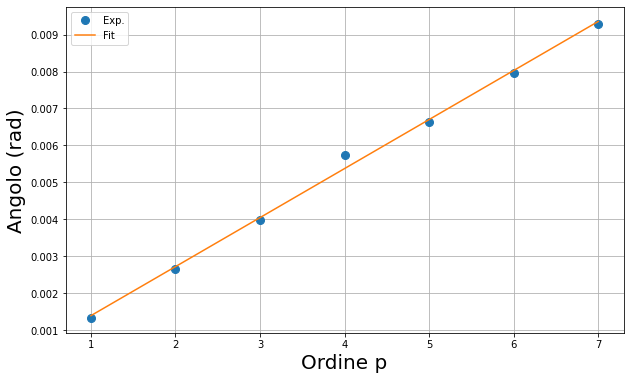

          b = 0.0004007733 +- 0.0000104530
          c = 0.0000632111 +- 0.0001548350




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0)

##Doppia Fenditura

Utilizzando una doppia fenditura, la figura di diffrazione  è dovuta a
due fenditure di larghezza
$b$
separate da una distanza
$d $. 

Pertanto, oltre agli zeri per i quali vale la relazione $sin\theta=\frac{\lambda}{b}p$, si osservano degli zeri più ravvicinati per i quali vale la relazione $sin\theta=\frac{\lambda}{d}(m+\frac{1}{2})$. 

Anche qui fittiamo i parametri $b$ e $d$ e verifichiamo che siano consistenti.

###Laser Rosso

####Fenditura $b=0.15mm$

In [ ]:
#Per fittare b
def retta(x,b,c):
    theta= 630E-9*x/b +c
    return theta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00420353982300885
2.0 	 0.0086283185840708
3.0 	 0.0126106194690265
4.0 	 0.0168141592920354
5.0 	 0.020353982300885
6.0 	 0.0247787610619469


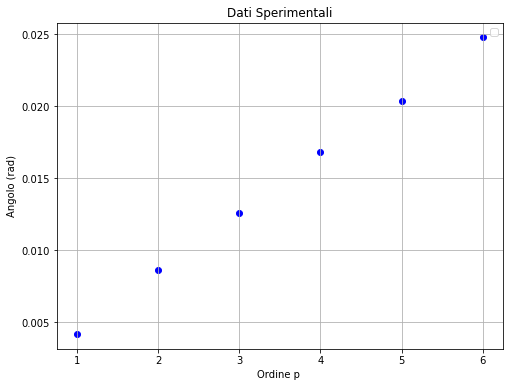

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.15_0.75_p.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

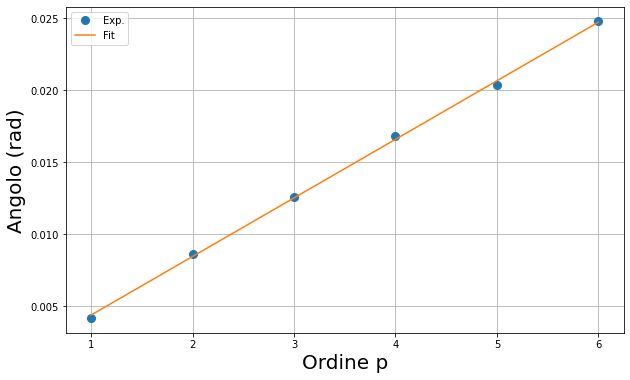

          b = 0.0001550016 +- 0.0000021199
          c = 0.0003392330 +- 0.0002164821




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0001,0.00001)

####Spaziaura $d=0.25mm$

In [ ]:
#Per fittare d
def retta(x,d,c):
    theta= 630E-9*(x+1/2)/d +c
    return theta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.00132743362831858
2.0 	 0.00420353982300885
3.0 	 0.00641592920353982
4.0 	 0.00884955752212389
5.0 	 0.0117256637168142
6.0 	 0.0139380530973451


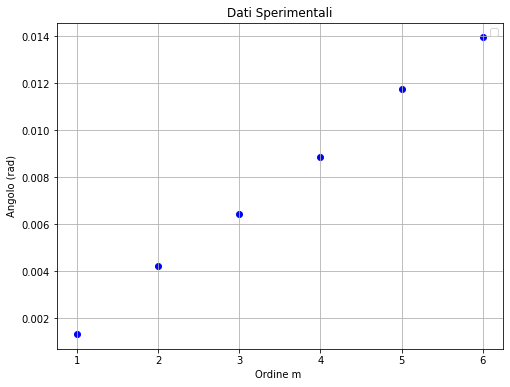

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.15_0.25_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()

  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

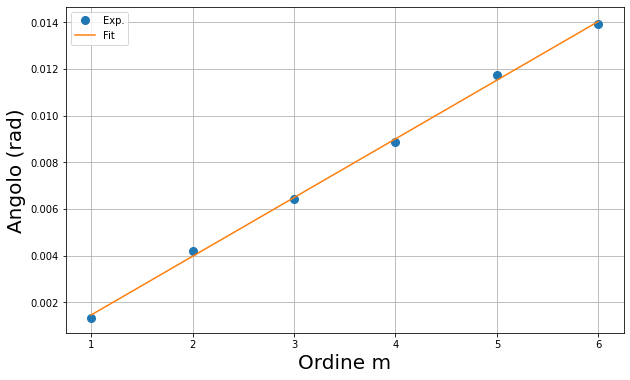

          d = 0.0002504171 +- 0.0000046236
          c = -0.0023198483 +- 0.0002020285




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.00025,0)

####Spaziatura $d=0.50mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.00088495575221239
2.0 	 0.00176991150442478
3.0 	 0.00331858407079646
4.0 	 0.00442477876106195
5.0 	 0.00575221238938053
6.0 	 0.00707964601769912
7.0 	 0.0081858407079646


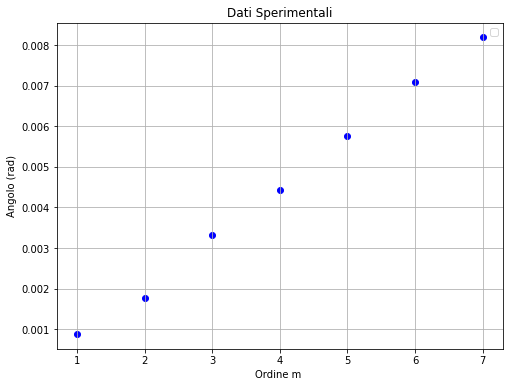

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.15_0.50_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()

  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

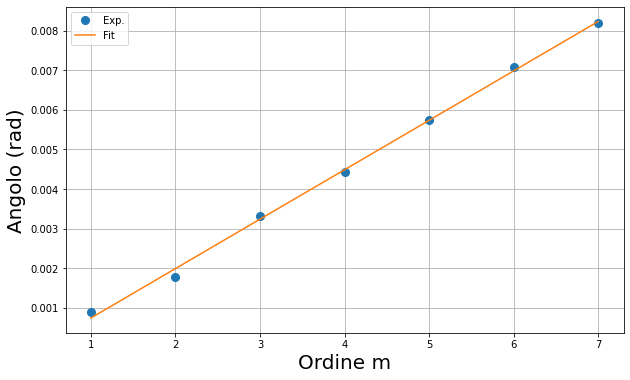

          d = 0.0005046380 +- 0.0000103001
          c = -0.0011298989 +- 0.0001254805




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0005,0)

####Spaziatura $d=0.75mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.000442477876106195
2.0 	 0.00154867256637168
3.0 	 0.00243362831858407
4.0 	 0.00331858407079646
5.0 	 0.00420353982300885


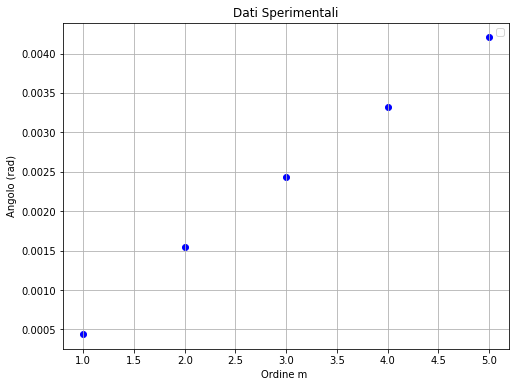

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("rosso_0.15_0.75_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()

  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n")

<Figure size 648x432 with 0 Axes>

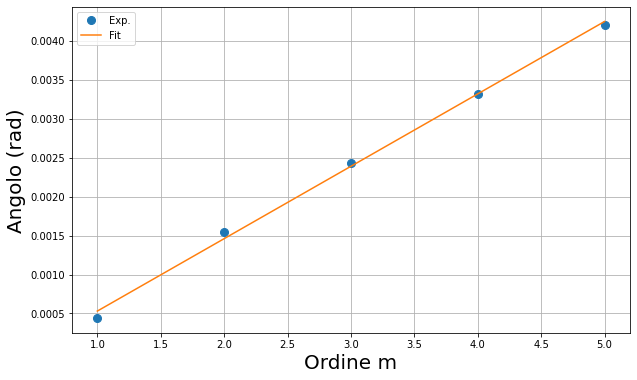

          d = 0.0006780000 +- 0.0000186402
          c = -0.0008628319 +- 0.0000964358




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.00075,0)

###Laser Verde

#### Fenditura $b=0.15mm$

In [ ]:
#Per fittare b
def retta(x,b,c):
    theta= 532E-9*x/b +c
    return theta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 p 		Angolo (rad)
1.0 	 0.00309734513274336
2.0 	 0.00752212389380531
3.0 	 0.0110619469026549
4.0 	 0.0139380530973451
5.0 	 0.0176991150442478


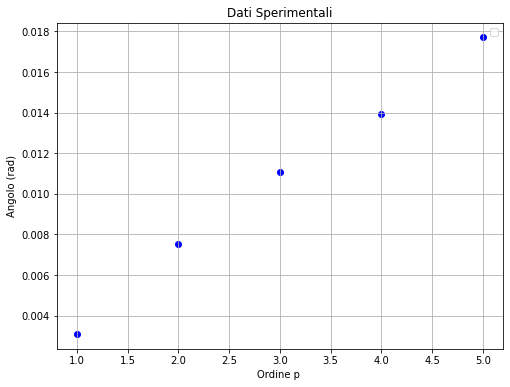

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.15_0.50_p.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n p \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine p ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(b,c, print_output=True, plot_guess=False):
 
  guess = np.array([b,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine p', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["b", "c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

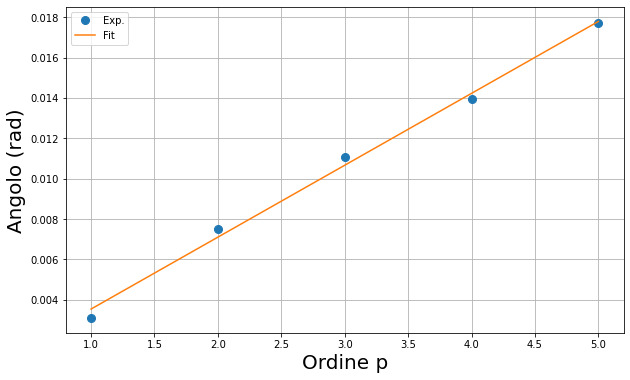

          b = 0.0001493565 +- 0.0000060359
          c = -0.0000221244 +- 0.0004774192




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.00001,0.00001)

####Spaziatura $d=0.25mm$

In [ ]:
#Per fittare d
def retta(x,d, c):
    theta= 532E-9*(x+1/2)/d +c 
    return theta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.00132743362831858
2.0 	 0.00309734513274336
3.0 	 0.00530973451327434
4.0 	 0.00730088495575221
5.0 	 0.00951327433628319
6.0 	 0.0117256637168142


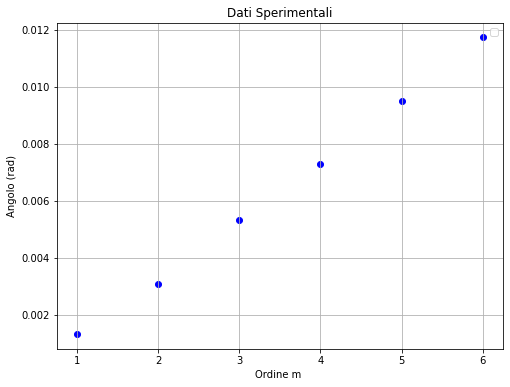

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.15_0.25_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

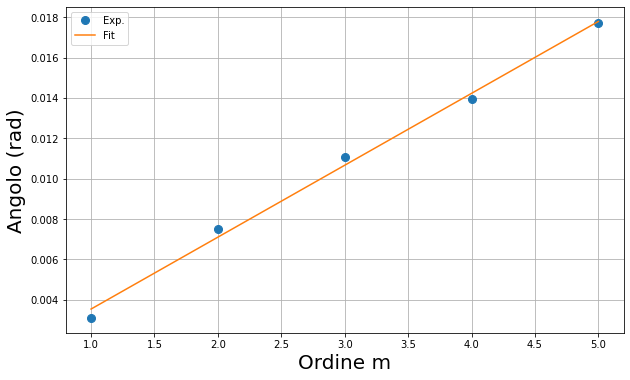

          d = 0.0001493565 +- 0.0000060359
          c = -0.0018030973 +- 0.0005433882




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.00025,0)

####Spaziatura $d=0.50mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.000663716814159292
2.0 	 0.00176991150442478
3.0 	 0.00265486725663717
4.0 	 0.00353982300884956
5.0 	 0.00420353982300885
6.0 	 0.00553097345132743


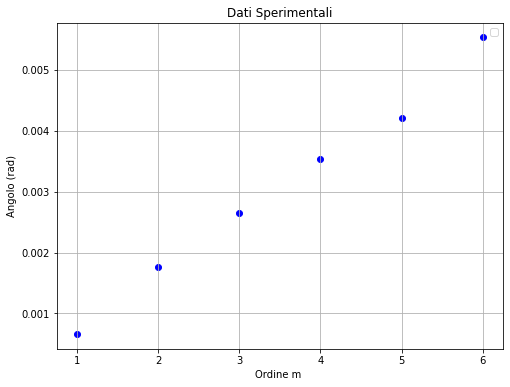

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.15_0.50_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

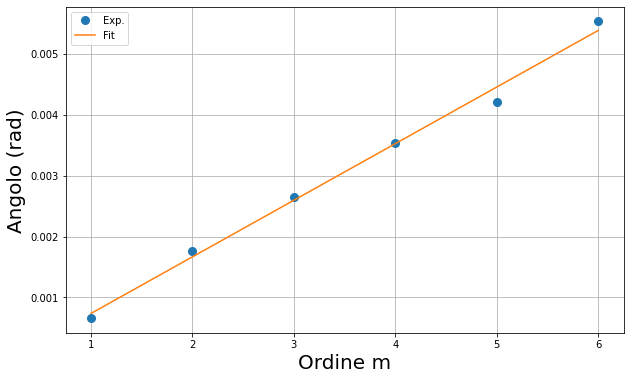

          d = 0.0005725333 +- 0.0000237975
          c = -0.0006563422 +- 0.0001679826




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.0005,0)

####Spaziatura $d=0.75 mm$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 m 		Angolo (rad)
1.0 	 0.000442477876106195
2.0 	 0.00088495575221239
3.0 	 0.00176991150442478
4.0 	 0.00243362831858407
5.0 	 0.00420353982300885


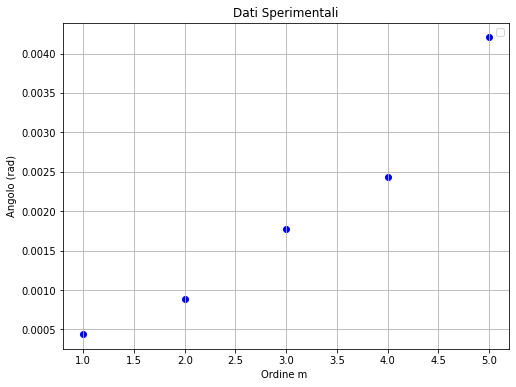

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("verde_0.15_0.75_m.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
p=dati[:,0] #ordine degli  zeri
angolo=dati[:,1] #radianti


print("\n m \t\tAngolo (rad)")
for i in range(len(p)):
  print(p[i],"\t",angolo[i])


plt.scatter(p, angolo, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Ordine m ")
plt.ylabel("Angolo (rad)")
plt.legend()

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(d,c, print_output=True, plot_guess=False):
 
  guess = np.array([d,c]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, p, angolo, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, retta(t, guess[0],guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(p)
  plt.figure(figsize=[10,6])
  xmin,xmax=p[0],p[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=retta(x,popt[0],popt[1])
  plt.xlabel('Ordine m', fontsize=20)
  plt.ylabel('Angolo (rad)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(p,angolo,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["d","c"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

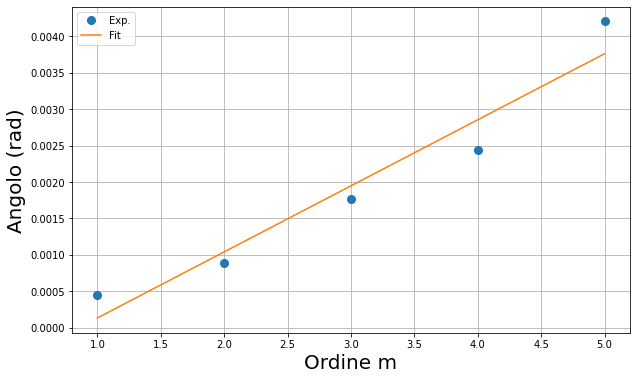

          d = 0.0005864976 +- 0.0000854306
          c = -0.0012278761 +- 0.0004987699




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(0.00075,0)

##Commento